In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
d = pd.read_csv('payments/RR.csv')
d = d[d['week_on_book'] > 0]
d = d[d['week_received'] != '2017-01-16']
d['RR'] = d['paid']/d['initial_amount']
pvt = pd.pivot_table(d, columns='week_on_book', index='week_received', values='RR')
pvt = pvt.cumsum(axis=1)

week_received - неделя выдачи  
week_on_book - неделя жизни  
initial_amount - выданная сумма
paid - собрано денег на этой неделе  
RR = paid / initial_amount

In [3]:
d.head()

,week_received,week_on_book,initial_amount,paid,RR
0,2015-06-15,25,146754,1461.35,0.009958
1,2015-06-15,57,146754,150.14,0.001023
2,2015-06-15,4,146754,19091.23,0.130090
3,2015-06-15,36,146754,1591.13,0.010842
4,2015-06-15,68,146754,39.50,0.000269


Сводная таблица

In [4]:
pvt.head()

week_on_book,1,2,3,4,5,6,7,8,9,10,...,78,79,80,81,82,83,84,85,86,87
week_received,,,,,,,,,,,,,,,,,,,,,
2015-06-15,0.160121,0.334109,0.522650,0.652740,0.689007,0.714276,0.734933,0.774544,0.793187,0.811954,...,1.109246,1.109392,1.112596,1.112793,1.112860,1.113002,1.113512,1.113709,1.113776,1.113843
2015-06-22,0.130506,0.238976,0.519011,0.713373,0.738647,0.768289,0.788352,0.814622,0.825597,0.840143,...,1.091591,1.091740,1.091878,1.092213,1.093132,1.093753,1.093949,1.094208,1.095028,1.095159
2015-06-29,0.104284,0.271664,0.536733,0.720422,0.753537,0.771073,0.801094,0.834337,0.846567,0.855295,...,1.113760,1.113995,1.114164,1.115612,1.116104,1.116546,1.117445,1.119670,1.120173,NaN
2015-07-06,0.150361,0.292177,0.512235,0.645215,0.674546,0.720403,0.757612,0.798563,0.816785,0.834840,...,1.125958,1.126195,1.127433,1.128723,1.130548,1.131035,1.132904,1.133891,1.133966,NaN
2015-07-13,0.155343,0.311950,0.491774,0.660345,0.711979,0.741314,0.779022,0.810006,0.825426,0.857935,...,1.099991,1.100062,1.100132,1.100389,1.100401,1.100593,NaN,NaN,NaN,NaN


Как вызревают недели. По оси абсцисс количество прожитых недель:


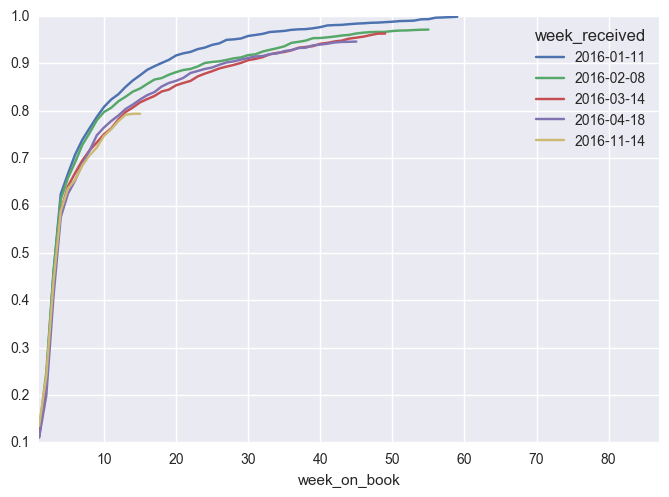

In [5]:
print("Как вызревают недели. По оси абсцисс количество прожитых недель:")
pvt.T[['2016-01-11', '2016-02-08', '2016-03-14', '2016-04-18', '2016-11-14']].plot();

Если посмотреть на ту же таблицу в другом разрезе (по оси абсцис неделя выдачи):


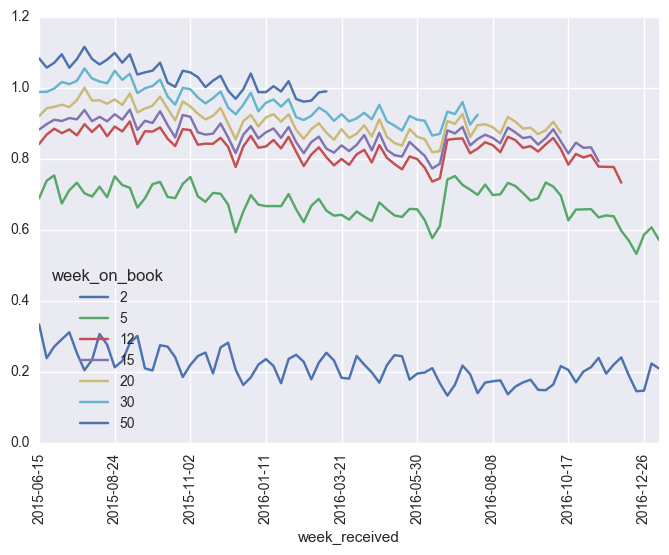

In [6]:
print("Если посмотреть на ту же таблицу в другом разрезе (по оси абсцис неделя выдачи):")
pvt[[2,5,12, 15, 20, 30, 50]].plot()
plt.xticks(rotation=90);


Разница между y[i] и y[i - 1] для разных недель выдачи


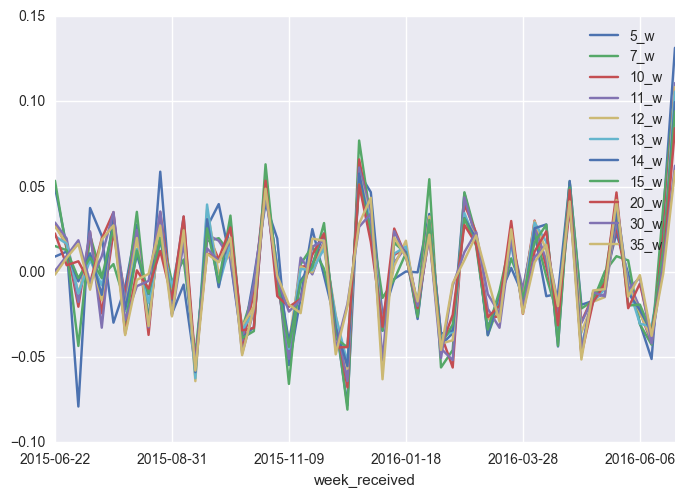

In [7]:
j = pvt[[5, 7, 10, 11, 12, 13, 14, 15, 20, 30, 35]]
j.columns = ['5_w', '7_w', '10_w', '11_w', '12_w', '13_w', '14_w', '15_w', '20_w', '30_w', '35_w']
j = j.diff(axis = 0).dropna()
print("\nРазница между y[i] и y[i - 1] для разных недель выдачи")
j.plot();

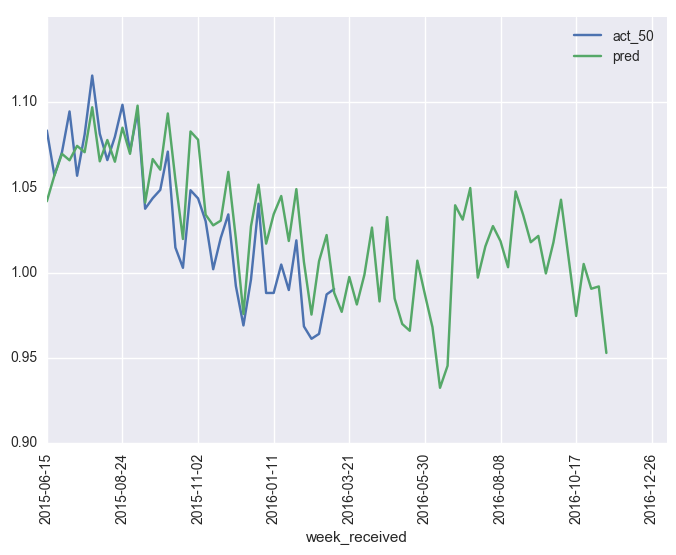

In [8]:
h_pred = pvt.ix[:, 15] - pvt.ix[1,15] + pvt.ix[1,50]
h_act = pvt.ix[:,50]
h = pd.DataFrame([h_act, h_pred]).T
h.columns = ['act_50', 'pred']
h[['act_50', 'pred']].plot()
plt.xticks(rotation=90);

Ошибка по неделя выдачи:


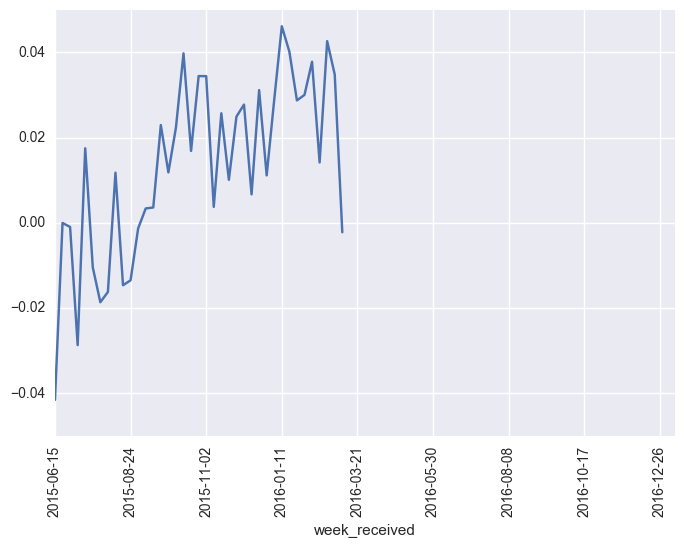

In [9]:
h['diff'] = h['pred'] - h['act_50']
print("Ошибка по неделя выдачи:")
h['diff'].plot()
plt.xticks(rotation=90);